**2.1**

In [ ]:
import torch

In [ ]:
arr = torch.arange(12, dtype=torch.float32)
arr.numel()
arr.shape
arr.reshape(-1,4)
arr.reshape(4,-1)

tensor([[ 0.,  1.,  2.],
        [ 3.,  4.,  5.],
        [ 6.,  7.,  8.],
        [ 9., 10., 11.]])

In [ ]:
zero = torch.zeros(2,3,4)
normal = torch.randn(2,3,4)
wrapped_list = torch.tensor([[1,2,3,4],[2,3,4,5],[3,4,5,6]])
wrapped_list

tensor([[1, 2, 3, 4],
        [2, 3, 4, 5],
        [3, 4, 5, 6]])

In [ ]:
wrapped_list[2] = 100
wrapped_list[:,3] = 100
wrapped_list = torch.exp(wrapped_list)
wrapped_list
# print(wrapped_list[-1], wrapped_list[:3])

tensor([[    inf,  7.3891, 20.0855,     inf],
        [ 7.3891, 20.0855, 54.5981,     inf],
        [    inf,     inf,     inf,     inf]])

In [ ]:
x = torch.tensor([[1.0, 2, 4, 8],[1.0, 2, 4, 8]])
y = torch.tensor([[2, 2, 2, 2],[1.0, 2, 4, 8]])
print(x,y)
print(x+y, x*y, x/y, x**y)

tensor([[1., 2., 4., 8.],
        [1., 2., 4., 8.]]) tensor([[2., 2., 2., 2.],
        [1., 2., 4., 8.]])
tensor([[ 3.,  4.,  6., 10.],
        [ 2.,  4.,  8., 16.]]) tensor([[ 2.,  4.,  8., 16.],
        [ 1.,  4., 16., 64.]]) tensor([[0.5000, 1.0000, 2.0000, 4.0000],
        [1.0000, 1.0000, 1.0000, 1.0000]]) tensor([[1.0000e+00, 4.0000e+00, 1.6000e+01, 6.4000e+01],
        [1.0000e+00, 4.0000e+00, 2.5600e+02, 1.6777e+07]])


In [ ]:
print(x,y)
xy = torch.cat((x,y), dim = 0)
yx = torch.cat((x,y), dim = 1)
print(xy, yx)
print(x > y)

tensor([[1., 2., 4., 8.],
        [1., 2., 4., 8.]]) tensor([[2., 2., 2., 2.],
        [1., 2., 4., 8.]])
tensor([[1., 2., 4., 8.],
        [1., 2., 4., 8.],
        [2., 2., 2., 2.],
        [1., 2., 4., 8.]]) tensor([[1., 2., 4., 8., 2., 2., 2., 2.],
        [1., 2., 4., 8., 1., 2., 4., 8.]])
tensor([[False, False,  True,  True],
        [False, False, False, False]])


**Broadcasting**

Two tensors are “broadcastable” if the following rules hold:

Each tensor has at least one dimension.
When iterating over the dimension sizes, starting at the trailing dimension, the dimension sizes must either be equal, one of them is 1, or one of them does not exist.

In [ ]:
a = torch.randint(5,(4,3))
b = torch.randint(3,(1,))
before = id(a)
#slice notation to allocate memory in place
a[:] = a + b
before == id(a)

True

In [ ]:
A = a.numpy()
B = torch.from_numpy(A)
type(A),type(B)

(numpy.ndarray, torch.Tensor)

In [ ]:
x = torch.tensor([3.5])
y = torch.tensor(3.5)
x.item(),y.item()

(3.5, 3.5)

**2.2**

In [ ]:
import os

os.makedirs(os.path.join('..', 'data'), exist_ok=True)
data_file = os.path.join('..', 'data', 'house_tiny.csv')
with open(data_file, 'w') as f:
    f.write('''NumRooms,RoofType,Price
NA,NA,127500
2,NA,106000
4,Slate,178100
NA,NA,140000''')

In [ ]:
with open(data_file, 'r') as f:
  print(f.read())

NumRooms,RoofType,Price
NA,3.0,127500
2,Brick,106000
4,Slate,178100
NA,NA,140000


In [ ]:
import pandas as pd

data = pd.read_csv(data_file)
data

,NumRooms,RoofType,Price
0,NaN,NaN,127500
1,2.0,NaN,106000
2,4.0,Slate,178100
3,NaN,NaN,140000


In [ ]:
inputs, targets = data.iloc[:, 0:2], data.iloc[:, 2]
#sets dummies as categoricals by default, must specify numerical containing columns
#creating dummies allows you to represent non numerical classifiers as numerical classifiers
inputs = pd.get_dummies(inputs, dummy_na=True)
inputs = inputs.fillna(inputs.mean())
inputs

,NumRooms,RoofType_Slate,RoofType_nan
0,3.0,False,True
1,2.0,False,True
2,4.0,True,False
3,3.0,False,True


In [ ]:
type(inputs.to_numpy().to_pandas)

AttributeError: 'numpy.ndarray' object has no attribute 'to_pandas'

In [ ]:
targets

,Price
0,127500
1,106000
2,178100
3,140000


In [ ]:
import torch
X = torch.tensor(inputs.to_numpy(dtype = float))
Y = torch.tensor(targets.to_numpy(dtype = float))
X,Y

(tensor([[3., 0., 1.],
         [2., 0., 1.],
         [4., 1., 0.],
         [3., 0., 1.]], dtype=torch.float64),
 tensor([127500., 106000., 178100., 140000.], dtype=torch.float64))

*2.2.5 Exercises*

In [ ]:
#practice loading dataset with missing values and formatting for torch
import torch
import seaborn as sns
import pandas as pd
import numpy as np
import

titanic_df = sns.load_dataset('titanic')
null_mask = titanic_df.isnull().any(axis = 1)
cleaned_df = titanic_df[null_mask].reset_index(drop = True)
cleaned_df = pd.get_dummies(cleaned_df)

inputs, targets = cleaned_df.iloc[:, 1:],cleaned_df.iloc[:,0]

X = torch.tensor(inputs.to_numpy(dtype = float))
y = torch.tensor(targets.to_numpy(dtype = float))
print(X.shape)
print(y.shape)

torch.Size([709, 30])
torch.Size([709])


**2.3**

In [ ]:
import torch
x = torch.tensor(3.0)
y = torch.tensor(4.0)
x+y, x-y, x*y, x**y

(tensor(7.), tensor(-1.), tensor(12.), tensor(81.))

In [ ]:
A = torch.randint(1,5, (2,2,2), dtype=float)
A, torch.linalg.norm(A)


(tensor([[[3., 3.],
          [2., 1.]],
 
         [[4., 1.],
          [2., 4.]]], dtype=torch.float64),
 tensor(7.7460, dtype=torch.float64))

**2.4**

In [ ]:
def f(x):
    return 3 * x ** 2 - 4 * x

f(1)

-1

In [ ]:
%matplotlib inline
import numpy as np
from matplotlib_inline import backend_inline
!pip install d2l
from d2l import torch as d2l

     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 10.7/10.7 MB 33.1 MB/s eta 0:00:00
  Installing build dependencies ... done
  error: subprocess-exited-with-error
  
  × Getting requirements to build wheel did not run successfully.
  │ exit code: 1
  ╰─> See above for output.
  
  note: This error originates from a subprocess, and is likely not a problem with pip.
  Getting requirements to build wheel ... error
error: subprocess-exited-with-error

× Getting requirements to build wheel did not run successfully.
│ exit code: 1
╰─> See above for output.

note: This error originates from a subprocess, and is likely not a problem with pip.


ModuleNotFoundError: No module named 'd2l'

In [ ]:
for h in 10.0**np.arange(-1, -6, -1):
  print(f"h: {h:.5f}, f': {(f(1+h)-f(1))/h: .5f}")

h: 0.10000, f':  2.30000
h: 0.01000, f':  2.03000
h: 0.00100, f':  2.00300
h: 0.00010, f':  2.00030
h: 0.00001, f':  2.00003


In [ ]:
def use_svg_display():  #@save
    """Use the svg format to display a plot in Jupyter."""
    backend_inline.set_matplotlib_formats('svg')

In [ ]:
!pip install numpy==1.23.5

  Using cached numpy-1.23.5.tar.gz (10.7 MB)
  Installing build dependencies ... done
  error: subprocess-exited-with-error
  
  × Getting requirements to build wheel did not run successfully.
  │ exit code: 1
  ╰─> See above for output.
  
  note: This error originates from a subprocess, and is likely not a problem with pip.
  Getting requirements to build wheel ... error
error: subprocess-exited-with-error

× Getting requirements to build wheel did not run successfully.
│ exit code: 1
╰─> See above for output.

note: This error originates from a subprocess, and is likely not a problem with pip.


In [ ]:
%matplotlib inline
import numpy as np
from matplotlib_inline import backend_inline
from d2l import torch as d2l

ModuleNotFoundError: No module named 'd2l'

In [ ]:
!pip install d2l

  Using cached d2l-1.0.3-py3-none-any.whl.metadata (556 bytes)
  Using cached jupyter-1.0.0-py2.py3-none-any.whl.metadata (995 bytes)
  Using cached numpy-1.23.5.tar.gz (10.7 MB)
  Installing build dependencies ... done
  error: subprocess-exited-with-error
  
  × Getting requirements to build wheel did not run successfully.
  │ exit code: 1
  ╰─> See above for output.
  
  note: This error originates from a subprocess, and is likely not a problem with pip.
  Getting requirements to build wheel ... error
error: subprocess-exited-with-error

× Getting requirements to build wheel did not run successfully.
│ exit code: 1
╰─> See above for output.

note: This error originates from a subprocess, and is likely not a problem with pip.


ModuleNotFoundError: No module named 'd2l'

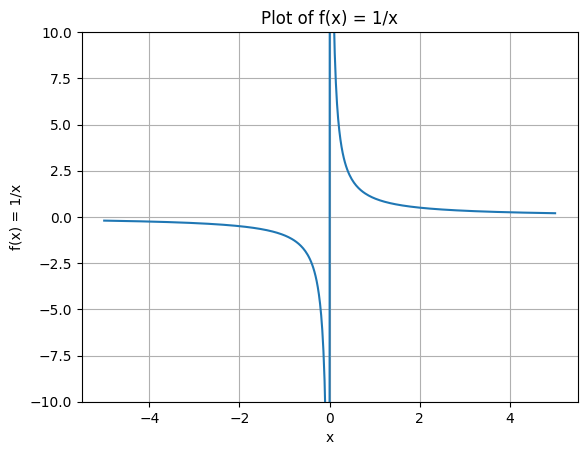

In [ ]:
import matplotlib.pyplot as plt
import numpy as np

def f(x):
  return 1/x

# Generate x values, avoiding zero
x_values = np.linspace(-5, 5, 400) # Generate 400 points between -5 and 5
x_values = x_values[x_values != 0] # Remove the zero value

# Calculate y values
y_values = f(x_values)

# Plot the function
plt.plot(x_values, y_values)
plt.xlabel('x')
plt.ylabel('f(x) = 1/x')
plt.title('Plot of f(x) = 1/x')
plt.grid(True)
plt.ylim(-10, 10) # Set y-axis limits for better visualization
plt.show()

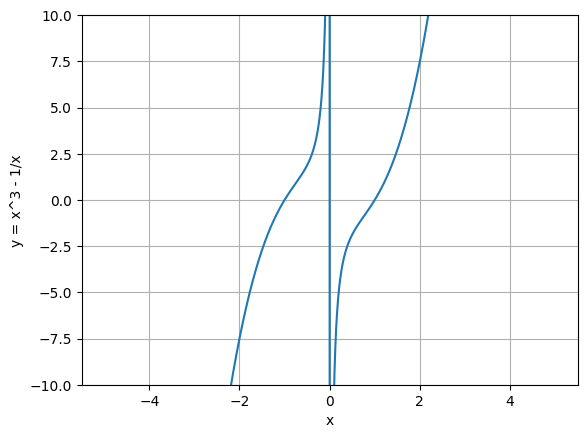

In [ ]:
import matplotlib.pyplot as plt
import numpy as np

def f(x):
  return (x**3) - (1/x)



xvalues = np.arange(-5,5,step = 0.001)
xvalues = xvalues[xvalues != 0]

yvalues = f(xvalues)

plt.plot(xvalues, yvalues)
plt.xlabel('x')
plt.ylabel('y = x^3 - 1/x')
plt.grid(True)
plt.ylim(-10,10)
plt.show()


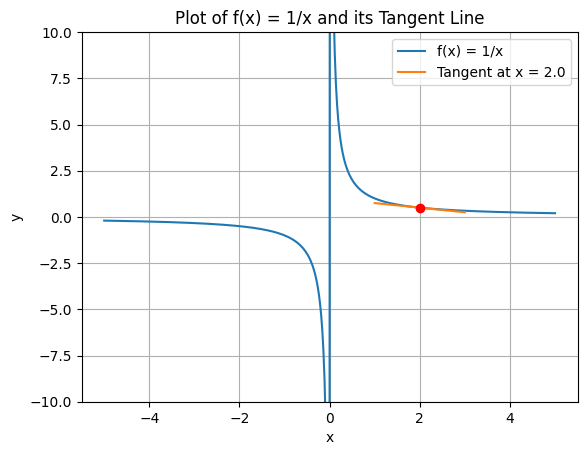

In [ ]:
import matplotlib.pyplot as plt
import numpy as np

def f(x):
  return 1/x

def df(x):
  return -1/(x**2)

# Point where we want to plot the tangent line
a = 2.0

# Calculate the y-value at the point 'a'
fa = f(a)

# Calculate the slope of the tangent line at 'a'
dfa = df(a)

# Generate x values for the plot, avoiding zero
x_values = np.linspace(-5, 5, 400)
x_values = x_values[x_values != 0]

# Calculate y values for the original function
y_values = f(x_values)

# Generate x values for the tangent line (around the point 'a')
# We'll create a small range around 'a' to plot the tangent line
tangent_x = np.linspace(a - 1, a + 1, 100)

# Calculate y values for the tangent line using the tangent line equation
tangent_y = dfa * (tangent_x - a) + fa

# Plot the original function
plt.plot(x_values, y_values, label='f(x) = 1/x')

# Plot the tangent line
plt.plot(tangent_x, tangent_y, label=f'Tangent at x = {a}')

# Plot the point of tangency
plt.plot(a, fa, 'ro') # 'ro' means red circle marker

plt.xlabel('x')
plt.ylabel('y')
plt.title('Plot of f(x) = 1/x and its Tangent Line')
plt.grid(True)
plt.ylim(-10, 10)
plt.legend()
plt.show()

**2.4 Autograd**

In [ ]:
import torch

x = torch.arange(4.0, requires_grad = True)
y = torch.dot(x,x)
y.backward()

In [ ]:
#we don't need to add influence of x on y into the x's gradient by creating a detached variable u
x.grad.zero_()
y = x * x
u = y.detach()
z = u * x

z.sum().backward()
x.grad == u

tensor([1., 3., 5., 7.])

In [ ]:
#still can access og variable y's relationship to x, just not in the ancestor computational graph
x.grad.zero_()
y.sum().backward()
x.grad == 2 * x

In [ ]:
def f(a):
    b = a * 2
    while b.norm() < 1000:
        b = b * 2
    if b.sum() > 0:
        c = b
    else:
        c = 100 * b
    return c

In [ ]:
a = torch.randn(size=(), requires_grad=True)
a


tensor(1.0379, requires_grad=True)

**2.6**

In [ ]:
%matplotlib inline
import random
import torch
from torch.distributions.multinomial import Multinomial

In [ ]:
num_tosses = 100
heads = sum([random.random() > 0.5 for _ in range(num_tosses)])
tails = num_tosses - heads
print(f'{heads} heads | {tails} tails')

36 heads | 64 tails


In [ ]:
fair_probs = torch.tensor([0.5,0.5])
counts = Multinomial(1, fair_probs).sample((10000,))

cum_counts = counts.cumsum(dim=0)
estimates = cum_counts / cum_counts.sum(axis = 1, keepdims = True)
type(estimates.numpy())


numpy.ndarray